# Approaches to AI:

|             | Humanly        | Rationally    |
|--------     | :------------: | :------------:|
|**Thinking** | Cognitive      | Logic         |
|**Acting**   | Turing         | Agents        |

Problem with Turing: Aeronautical engineering texts do not define the goal of their field as making “machines that fly so exactly like pigeons that they can fool even other pigeons.”

## Rational agent

An **agent** is anything that can be viewed as perceiving its **environment** through **sensors** and acting upon that environment through **actuators**.

**Percept** refers to the agent’s perceptual inputs at any given instant. An agent’s **percept sequence** is the complete history of everything the agent has ever perceived. For each possible percept sequence there the agent performs some **action**.

An agent’s behavior is described by the **agent function** that maps any given percept sequence to an action.

# Pseudocode

- Persistent variables: Variable given an initial value the first time a function is called and retains that value on all subsequent calls to the function. Like global variables in that they outlive a single call to their function, but they are accessible only within the function. In Python:
```python
class X:
    __init__(self, value):
    self.x = value  # x is a persistent variable
    ...
```
- Functions as values: Functions and procedures have capitalized names, and variables have lowercase italic names - FN$(x)$ or $f$.

- **for each**: "for each x in c do”. In Python:
```python
for x in c
```

- Indentation: Used to mark the scope of a loop or conditional, as in Python.

- Destructuring assignment: $x, y \leftarrow pair$ means that the right-hand side must evaluate to a two-element tuple, and the first element is assigned to x and the second to y. In Python:
```python
x, y = pair
```

- Generators and yield: “**generator** $G(x )$ **yields** numbers” defines G as a generator function. Yields a value when expression is called. In Python:
```python
def powers_of_two():
    i = 0
    while True:
      yield i
      i = 2 ** i 
```

-  Lists: [x, y, z] denotes a list of three elements. [first|rest] denotes a list formed by adding first to the list rest. In Python:
```python
first = [x, y, z]
z = first + rest
```

- Sets: {x, y, z} denotes a set of three elements. {x : p(x)} denotes the set of all elements x for which p(x) is true. In Python:
```python
s = {x, y, z}
s = {x for x in s if p(x)}
```

- Arrays start at 1: Unless stated otherwise, not 0, as in Python.

# Solving Problems by Searching

## Problem definition

A problem can be defined formally by five components:

- The **initial state** that the agent starts in e.g. In(Arad).

- The **actions** available to the agent - ACTIONS(s). For example,  ACTIONS(s) = {Go(Sibiu), Go(Timisoara), Go(Zerind)}.

- A **transition model** that describe what each action does - RESULT(s, a). E.g.  For example, RESULT(In(Arad),Go(Zerind)) = In(Zerind).

 Sometimes a successor function is used to return the set of all successors, instead of separate ACTIONS and RESULT functions, but this makes it difficult to describe an agent that knows what actions it can try but not what they achieve.

 The **space state** of the problem is defined by the initial state, actions, and transition model. It is the set of all states reachable from the initial state by any sequence of actions.

 This forms a **graph** in which the nodes are states and the links between nodes are actions.

 A **path** in the state space is a sequence of states connected by a sequence of actions.

- The **goal test** determines whether a given state is a goal state. Can be explicit, e.g. {In(Bucharest)} for abstract, e.g. “checkmate” where the opponent’s king is under attack and can’t escape.

- A **path cost** function that assigns a numeric cost to each path that reflects the agent's own performance measure, e.g. path length.

 Often the sum of the **step cost** of each action along the path - c(s, a, s
).

## Problem solution (move after Graphs??)

A solution is an action sequence, so search algorithms work by considering various possible action sequences. The possible action sequences starting at the initial state form a **search tree** with the initial state at the root; the branches are actions and the **nodes** correspond to states in the state space of the problem.

For finding a route from Arad to Bucharest:

- The root node of the tree corresponds to the initial state, In(Arad).

- The first step is to test whether this is a goal state.

- If not, consider taking various actions, by **expanding** the current state; that is, applying each legal action to the current state, thereby **generating** a new set of states. For example three branches from the **parent node** In(Arad) leading to three new **child nodes**: In(Sibiu), In(Timisoara), and In(Zerind). Now we must choose which of these three
possibilities to consider further.

- Choose one, e.g. Sibiu.

- Check to see whether it is a goal state

- If not, expand it to get In(Arad), In(Fagaras), In(Oradea), and In(RimnicuVilcea).

- Choose any of these four or go back and choose Timisoara or Zerind. Each of these six nodes is a **leaf node**, that is, a node with no children in the tree. The set of all leaf nodes available for expansion at any given point is called the **frontier** (or **open list**).

- Continue expanding nodes on the frontier until either a solution is found or there are no more states to expand.

Search algorithms all share this basic structure; they vary primarily according to how they choose which state to expand next—the so-called **search strategy**.



## General search strategy

```python
def tree[graph]_search(problem) -> solution:
  frontier = [initial state of problem] 
  # explored = []
  while True:
    if frontier.is_empty(): return failure
    leaf_node = frontier.get_node()
    if problem.goal in leaf_node: return solution
    # explored.add(leaf_node)
    nodes = leaf_node.expand()
    explored.add(node) for node in nodes if node not in frontier and node not in explored
```

**function** TREE[or GRAPH]-SEARCH($problem$) **returns** a solution, or failure</br>
 $frontier \leftarrow$ initialise using initial state of problem</br>
 [$explored \leftarrow$ an empty set]</br>
 **loop do**</br>
  **if** EMPTY?($frontier$) **then return** failure</br>
  $node \leftarrow$ leaf node from frontier</br>
  **if** $problem$.GOAL-TEST($node$) **then return** SOLUTION()</br>
  [add $node$ to $explored$]</br>
  $frontier \leftarrow$ expand the chosen node, adding resulting nodes to frontier [**if** $node$ is not in $explored$ or $frontier$]</br>

To avoid exploring redundant paths modify the search to  remember where one has been. Use a data structure called the **explored set** (or **closed list**), which remembers every expanded node. Newly generated nodes that match previously generated nodes — ones in the explored set or the frontier — can be discarded instead of being added to the frontier.

The resulting algorithm is called GRAPH-SEARCH (the additional steps are show in square brackets above).

## Data structure for search

For each node n of the tree, thre are four components:

- n.STATE: the state in the state space to which the node corresponds

- n.PARENT: the node in the search tree that generated this node

- n.ACTION: the action that was applied to the parent to generate the node

- n.PATH-COST: the cost, traditionally denoted by g(n), of the path from the initial state to the node, as indicated by the parent pointers

There are several functions used to navigate the tree:

- n.CHILD-NODE takes a parent node and an action and returns the resulting child node

- SOLUTION(element) function returns the sequence of actions obtained by following parent pointers back to the root.

A node is a bookkeeping data structure used to represent the search tree. A state corresponds to a configuration of the
world. Thus, nodes are on particular paths, as defined by PARENT pointers, whereas states are not. Furthermore, two different nodes can contain the same world state if that state is
generated via two different search paths.

The nodes in the frontier needs to be stored in such a way that the search algorithm can easily choose the next node to expand according to its preferred strategy. The appropriate data structure for this is a **queue**. The operations on a queue are as follows:

- EMPTY?(queue) returns true only if there are no more elements in the queue.

- POP(queue) removes the first element of the queue and returns it.

- INSERT(element, queue) inserts an element and returns the resulting queue.

Queues are characterized by the order in which they store the inserted nodes:

- FIFO QUEUE variants are the first-in, first-out or FIFO queue, which pops the oldest element of the queue

- LIFO QUEUE the last-in, first-out or LIFO queue (also known as a stack), which pops the newest element

- PRIORITY QUEUE of the queue; and the priority queue, which pops the element of the queue with the highest priority according to some ordering function


## Breadth-first search

**Breadth-first search** is a simple strategy in which the root node is expanded first, then all the successors of the root node are expanded next, then their successors, and so on. In general,
all the nodes are expanded at a given depth in the search tree before any nodes at the next level are expanded.

Breadth-first search is an instance of the general graph-search algorithm in which the shallowest unexpanded node is chosen for expansion. This is achieved by by using a FIFO queue for the frontier.

```python
def breadth_first_search(problem) -> solution:
  frontier = [initial state of problem] 
  # explored = []
  while True:
    if frontier.is_empty(): return failure
    leaf_node = frontier.get_node()
    if problem.goal in leaf_node: return solution
    # explored.add(leaf_node)
    nodes = leaf_node.expand()
    explored.add(node) for node in nodes if node not in frontier and node not in explored
```

**function** BREADTH-FIRST-SEARCH($problem$) **returns** a solution, or failure</br>
 $node \leftarrow$ a node with STATE = $problem$.INITIAL-STATE, PATH-COST = 0</br>
 **if** $problem$.GOAL-TEST($node$.STATE) **then return** SOLUTION(*node*)</br>
 $frontier \leftarrow$ a FIFO queue with $node$ as the only element</br>
 $explored \leftarrow$ an empty set</br>
 **loop do**</br>
  **if** EMPTY?($frontier$) **then return** failure</br>
  $node \leftarrow$ POP($frontier$)  /* chooses the shallowest node in frontier */</br>
  add $node$.STATE to $explored$</br>
  **for each** $action$ **in** $problem$.ACTIONS($node$.STATE) **do**</br>
   $child \leftarrow$ CHILD-NODE($problem, node, action$)</br>
   **if** $child$.STATE is not in $explored$ or $frontier$ **then**</br>
     **if** $problem$.GOAL-TEST($child$.STATE) **then return** SOLUTION($child$)</br>
     $frontier \leftarrow$ INSERT($child,frontier$)


## Graphs

**Graphs** are structures that map relations between objects. The objects are referred to as **nodes** and the connections between them as **edges**.

node == vertex == point

edge == arc == link

An **undirected** has edges with no orientation: they are bi-directional. For example: A<--->B == B<--->A. In a **directed** graph the order and direction of edges matters. For example: A--->B != B--->A. This can be used for graphs to determine the shortest path.

**Degree** is the number of edges incident to (touching) a node.

A **Eulerian tour** is a graph where a cycle that passes through every edge exactly once can be made from a starting node back to itself (without backtracking).

A **matching** is a subset of edges in which no node occurs more than once. A **minimum weight matching** finds the matching with the lowest possible summed edge weight.


Graph with 6 nodes and 3 edges
[9, 2, 4, 6, 1, 3]
[(2, 4), (2, 6), (1, 3)]
[(1, 3), (2, 4), (2, 6)]
[4, 6]
2
{2: {'color': 'yellow'}}
[1, 4]
DiGraph with 2 nodes and 1 edges


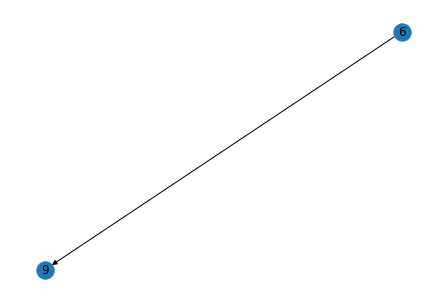

In [ ]:
"""Graph testing"""

import networkx as nx

G = nx.Graph()  # empty graph
D = nx.DiGraph()

# Nodes
G.add_node(9)  # add single node
# G.remove_node(9)

G.add_nodes_from([2, 4, 6])  # add nodes from iterable
# G.remove_nodes_from([2, 4, 6])

# Edges
G.add_edge(1, 3)  # add edge tuple
# G.remove_edge(1, 3)

G.add_edges_from([(2, 4), (2, 6)])

# nx ignores multiply defined nodes and edges

print(G)

#G.clear()  # remove all nodes and edges

# Examining elements
nodes = list(G.nodes)  # order of adding
print(nodes)

edges = list(G.edges)  # edges in order of nodes and adjacencies
print(edges)

edges = G.edges([1, 2])  # specify from iterable
print(edges)

adj = list(G.adj[2])  # = G.neighbors(2) and G[2]
print(adj)

deg = G.degree[2]
print(deg)

# Accessing edges and neighbours
G2 = nx.Graph([(1, 2, {"color": "yellow"})])

edges2 = G2[1]  # dictionary of adjacent nodes with attributes
print(edges2)

FG = nx.Graph()
FG.add_weighted_edges_from([(1, 2, 0.125), (1, 3, 0.75), (2, 4, 1.2), (3, 4, 0.375)])
print(list(FG.neighbors(2)))

#for n, nbrs in FG.adj.items():
  #print(n, nbrs)
   #for nbr, eattr in nbrs.items():
       #wt = eattr['weight']
       #if wt < 0.5: print(f"({n}, {nbr}, {wt:.3})")

#D.add_nodes_from([3, 6, 9])
D.add_edge(6, 9)
print(D)




# Visualise
import matplotlib.pyplot as plt

nx.draw(D, with_labels=True)


{('Arad', 'Sibiu'): Text(22.735460099999997, 45.9866796, '140'),
 ('Arad', 'Timisoara'): Text(21.2638395, 45.962419499999996, '118'),
 ('Bucharest', 'Giurgiu'): Text(26.034265650000002, 44.1660236, '90'),
 ('Bucharest', 'Urziceni'): Text(26.3675634, 44.5765717, '85'),
 ('Craiova', 'Pitesti'): Text(24.3342518, 44.5881251, '138'),
 ('Drobeta', 'Craiova'): Text(23.224879450000003, 44.4723997, '120'),
 ('Fagaras', 'Bucharest'): Text(25.5365213, 45.14054235, '211'),
 ('Hirsova', 'Eforie'): Text(28.296999800000002, 44.3647869, '86'),
 ('Iasi', 'Neamt'): Text(27.0342654, 47.07609555, '87'),
 ('Lugoj', 'Mehadia'): Text(22.135532050000002, 45.295050149999994, '70'),
 ('Mehadia', 'Drobeta'): Text(22.509315800000003, 44.7650864, '75'),
 ('Oradea', 'Sibiu'): Text(23.0354316, 46.4219461, '151'),
 ('Oradea', 'Zerind'): Text(21.717697, 46.835756, '71'),
 ('Pitesti', 'Bucharest'): Text(25.4873312, 44.64668785, '101'),
 ('Rimnicu Vilcea', 'Craiova'): Text(24.080641149999998, 44.7110945, '146'),
 ('Rimn

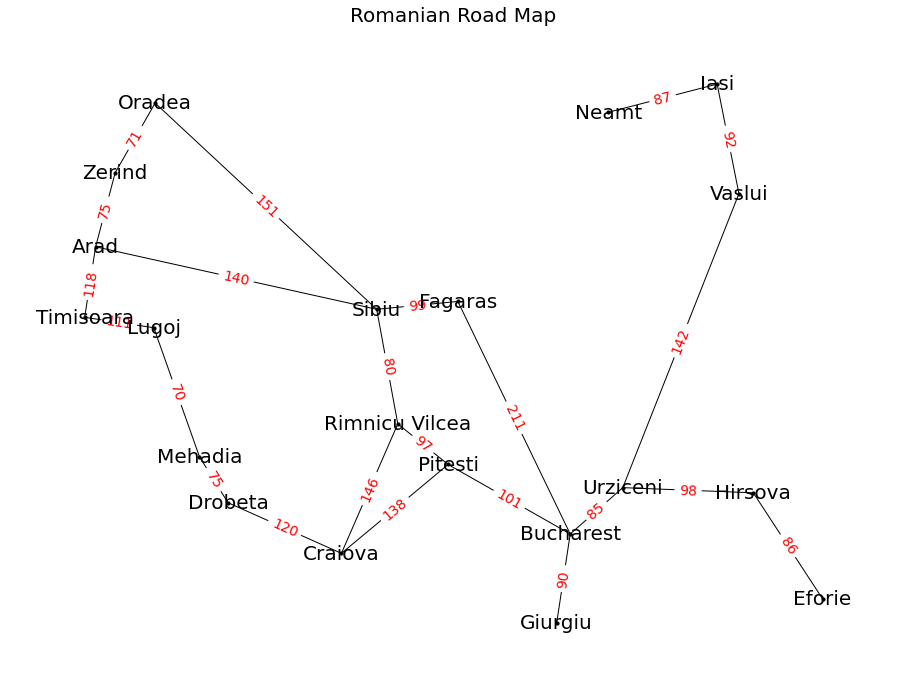

In [ ]:
from io import StringIO
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import networkx as nx


# Romanian towns as nodes and positions
nodelist = pd.read_csv(StringIO("""
id,X,Y
Oradea,47.046501,21.918943
Zerind,46.625011,21.516451
Arad,46.175968,21.319000
Timisoara,45.748871,21.208679
Lugoj,45.685711,21.905630
Mehadia,44.9043893,22.3654341
Drobeta,44.6257835,22.6531975
Sibiu,45.7973912,24.1519202
Rimnicu Vilcea,45.1031731,24.3647209
Craiova,44.3190159,23.7965614
Pitesti,44.8572343,24.8719422
Fagaras,45.8449433,24.9703224
Bucharest,44.4361414,26.1027202
Giurgiu,43.8959058,25.9658111
Urziceni,44.717002,26.6324066
Vaslui,46.4977648,27.8030855
Iasi,47.1615341,27.5836142
Neamt,46.990657,26.4849166
Hirsova,44.68574,27.94819
Eforie,44.0438338,28.6458096
"""))

# roads between towns
edgelist = pd.read_csv(StringIO("""
node1,node2,distance,color
Oradea,Zerind,71,black
Oradea,Sibiu,151,black
Zerind,Arad,75,black
Arad,Sibiu,140,black
Arad,Timisoara,118,black
Timisoara,Lugoj,111,black
Lugoj,Mehadia,70,black
Mehadia,Drobeta,75,black
Drobeta,Craiova,120,black
Sibiu,Fagaras,99,black
Sibiu,Rimnicu Vilcea,80,black
Rimnicu Vilcea,Craiova,146,black
Rimnicu Vilcea,Pitesti,97,black
Craiova,Pitesti,138,black
Pitesti,Bucharest,101,black
Fagaras,Bucharest,211,black
Bucharest,Giurgiu,90,black
Bucharest,Urziceni,85,black
Urziceni,Vaslui,142,black
Vaslui,Iasi,92,black
Iasi,Neamt,87,black
Urziceni,Hirsova,98,black
Hirsova,Eforie,86,black
"""))

# Create empty graph
g = nx.Graph()

# Add node attributes
for i, nlrow in nodelist.iterrows():
    g.add_node(nlrow['id'], **nlrow[1:].to_dict())

# Add edges and edge attributes
for i, elrow in edgelist.iterrows():
    g.add_edge(elrow[0], elrow[1], **elrow[2:].to_dict())

# Define node positions data structure (dict) for plotting
# Lattitude is new Y, longitude is X
node_positions = {node[0]: (node[1]['Y'], node[1]['X']) for node in g.nodes(data=True)}

# Preview of node_positions with a bit of hack (there is no head/slice method for dictionaries).
#print(dict(list(node_positions.items())))

# Define data structure (list) of edge colors for plotting
edge_colors = [e[2]['color'] for e in g.edges(data=True)]

# Define dictionary of tuples of edges and distance for plotting edge labels
edge_labels = {(e[0], e[1]): e[2]['distance'] for e in g.edges(data=True)}

fig = plt.figure(figsize=(16, 12))
plt.title('Romanian Road Map', size=20)
fig.set_tight_layout(False)  # get rid of tight layout error

plt.title(f'Romanian Road Map', size=20)

nx.draw(g, pos=node_positions, edge_color='black', with_labels=True,
        font_size=20, node_size=10, node_color='black')
nx.draw_networkx_edge_labels(g, pos=node_positions, edge_labels=edge_labels,
                              font_color='red', font_size=14)


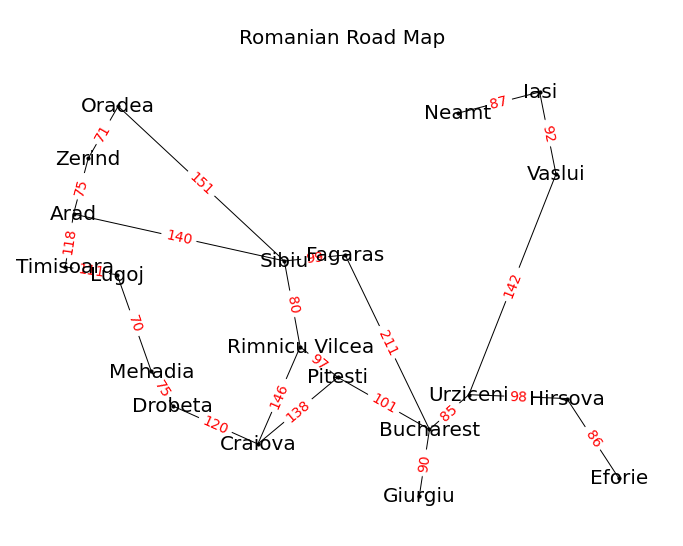

In [ ]:
"""
Implementation of breadth-first search on Romanian roads

Take pseudo code and add implementation:

def breadth_first_search(problem) -> solution:
  frontier = [initial state of problem]  # --> deque(start_pos)
  # explored = []
  while True:
    if frontier.is_empty(): return failure  # --> if not frontier: return failure
    leaf_node = frontier.get_node()  # --> frontier.pop()
    if problem.goal in leaf_node: return solution 
    # explored.add(leaf_node)
    nodes = leaf_node.expand()  # --> 
    explored.add(node) for node in nodes if node not in frontier and node not in explored

"""
from collections import deque

import matplotlib.pyplot as plt
from ipywidgets import Dropdown, Button, Text, IntText, HBox, VBox, widgets, Layout
from IPython.display import clear_output

class Node:
  """Represent a node"""
  def __init__(self, state, parent, cost):
    self.state = state #  the state in the state space to which the node corresponds
    self.parent = parent #  the node in the search tree that generated this node
    self.action = 0  # the action that was applied to the parent to generate the node
    self.path_cost = cost  # the cost, traditionally denoted by g(n), of the path from the initial state to the node, as indicated by the parent pointers

class Search:
  """Perform different search strategies"""
  def __init__(self, search_type, filter, start, goal):
    self.search_type = search_type
    self.filter_type = filter
    self.start = start
    self.goal = goal
  
  def solution(self, last_node, enqueuings):
    """Return the sequence of states obtained by following parent pointers back to root"""
    nodes = []
    node = last_node
    while node.parent is not None:
      nodes.append(node.state)
      node = node.parent
    nodes.append(node.state)
    return nodes[::-1], last_node.path_cost, enqueuings

  def breadth_first_search(self) -> solution:
    frontier = deque([Node(self.start, None, 0)])
    explored = set()  # set of explored nodes
    enqueuings = 0  # number of enqueuings
    load = frontier.append if self.search_type == 'Depth-first' else frontier.appendleft
    while True:
      if not frontier: return False
      leaf_node = frontier.pop()
      if leaf_node.state == self.goal: return self.solution(leaf_node, enqueuings) 
      if self.filter_type == "Use Extended List": explored.add(leaf_node.state)
      # get name and attributes of leaf node e.g. 'Arad', {'distance': 118}
      for child, attr in g[leaf_node.state].items():  
        # generate child node with leaf as parent and add cost to child
        node = Node(child, leaf_node, leaf_node.path_cost + attr['distance'])
        if node.state not in explored and node not in frontier:
          load(node)
          enqueuings += 1

# boxes for search parameters
type_box = Dropdown(description='Type:', options=['Depth-first', 'Breadth-first'], value='Depth-first', disabled=False,)
speed_box = Dropdown(description='Speed:', options=['1 frame/sec', '4 frame/sec', '30 frame/sec', 'No delay'], value='1 frame/sec', disabled=False,)
filter_box = Dropdown(description='Filter:', options=['None', 'Use Extended List'], value='None', disabled=False,)
start_box = Dropdown(description='Start:', options=[node for node in g.nodes], value='Arad', disabled=False,)
goal_box = Dropdown(description='Goal:', options=[node for node in g.nodes], value='Bucharest', disabled=False,)

search_button = Button(description='Search')

# searh menu bar
menu = HBox([type_box, speed_box, filter_box, start_box, goal_box, search_button])

# search info
enque_text = Text(description='Enqueuings:', value='', placeholder='',  disabled=False, layout=Layout(width='140px'))
ext_text = Text(description='Extensions:', value='', placeholder='',  disabled=False, layout=Layout(width='140px'))
info = HBox([enque_text, ext_text])

# search path output
path_text = Text(description='Path:', value='', placeholder='',  disabled=False, layout=Layout(width='750px'))
path_length = Text(description='Length:', value='', placeholder='',  disabled=False, layout=Layout(width='140px'))
path = HBox([path_text, path_length])

s = Search(type_box.value, filter_box.value, start_box.value, goal_box.value)

def type_box_eventhandler(change):
    """Eventhandler for the search type dropdown widget"""
    global search_type
    s.search_type = change.new

def filter_box_eventhandler(change):
    """Eventhandler for the seach type dropdown widget"""
    global filter_type
    s.filter_type = change.new

def start_box_eventhandler(change):
    """Eventhandler for the seach type dropdown widget"""
    global start
    s.start = change.new

def goal_box_eventhandler(change):
    """Eventhandler for the seach type dropdown widget"""
    global goal
    s.goal = change.new

def btn_eventhandler(obj):
    path_text.value = 'Searching...'
    path, cost, enqueuings = s.breadth_first_search()
    enque_text.value = str(enqueuings)
    path_text.value = ', '.join(path)
    path_length.value = str(cost)

type_box.observe(type_box_eventhandler, names='value')
filter_box.observe(filter_box_eventhandler, names='value')
start_box.observe(start_box_eventhandler, names='value')
goal_box.observe(goal_box_eventhandler, names='value')

search_button.on_click(btn_eventhandler)

# Define node positions data structure (dict) for plotting
# Lattitude is new Y, longitude is X
node_positions = {node[0]: (node[1]['Y'], node[1]['X']) for node in g.nodes(data=True)}

# Define data structure (list) of edge colors for plotting
edge_colors = [e[2]['color'] for e in g.edges(data=True)]

# Define dictionary of tuples of edges and distance for plotting edge labels
edge_labels = {(e[0], e[1]): e[2]['distance'] for e in g.edges(data=True)}

# output widget for graph
out = widgets.Output()
fig = plt.figure(figsize=(12, 9))
plt.title('\nRomanian Road Map', size=20)
fig.set_tight_layout(False)  # get rid of tight layout error

with out:
  nx.draw(g, pos=node_positions, edge_color='black', with_labels=True,
          font_size=20, node_size=10, node_color='black')
  nx.draw_networkx_edge_labels(g, pos=node_positions, edge_labels=edge_labels,
                              font_color='red', font_size=14)

#plt.show()
widgets.VBox([menu, info, path, out])


In [ ]:
# Simple mypy cell magic for Colab
!pip install mypy
from IPython.core.magic import register_cell_magic
from IPython import get_ipython
from mypy import api

@register_cell_magic
def mypy(line, cell):
  for output in api.run(['-c', '\n' + cell] + line.split()):
    if output and not output.startswith('Success'):
      raise TypeError(output)
  get_ipython().run_cell(cell)

     |████████████████████████████████| 14.0 MB 3.8 MB/s 
     |████████████████████████████████| 843 kB 81.9 MB/s 


In [ ]:
%%mypy

def foo(x: int) -> int:
  return 2 * x

foo(2)

4

## Winston algorithm

**function** BREADTH-FIRST-SEARCH($problem$) **returns** a solution, or failure</br>
 $frontier \leftarrow$ a FIFO queue with $node$ as the only element  # e.g. S</br>
 $explored \leftarrow$ an empty set  # of paths that end on given node</br>
 **loop do**</br>
  $path \leftarrow$ POP($frontier$)  # take path from front of queue</br>
  **if** GOAL-TEST($path$) **then return** SOLUTION($path$)  # goal in path</br>
  **if** $path$ is not in $explored$ **then**  # no previous path that ends on same node</br>
    $paths \leftarrow$ EXTEND($path$)  # e.g. (S A), (S B) - continue loop if not possible</br>
    $frontier \leftarrow$ ENQUE($paths$)  # on back of queue for breadth-first</br>







## Python implementations

### Hettinger slides

```python
from collections import deque
"""
Stack: deque.append(e) and deque.pop()
Queue: deque.appendleft(e) and deque.pop()
"""
def solve(pos, depthFirst=False):
  """Search with queue(deque) and extended list"""
    queue = deque([pos])
    trail = {intern(pos.canonical()): None}
    solution = deque()
    # for depth-first: Stack - deque.append(e) and deque.pop()
    # for breadth-first: Queue - deque.appendleft(e) and deque.pop()
    load = queue.append if depthFirst else queue.appendleft

    while not pos.isgoal():
        for m in pos:
            c = m.canonical()
            if c in trail:
                continue
            trail[intern(c)] = pos
            load(m)
        pos = queue.pop()

    while pos:
        solution.appendleft(pos)
        pos = trail[pos.canonical()]

    return list(solution)
```

In [ ]:
""" Generic Puzzle Solving Framework
Based on: version 9, (27-Mar-2002) of Raymond Hettinger's short library'
http://users.rcn.com/python/download/python.htm
Modified by Freek Dijkstra for Python 3.
License:  Public Domain
"""

""" Simple Instructions:
Create your puzzle as a subclass of Puzzle().
The first step is to choose a representation of the problem
state preferably stored as a string.  Set 'pos' to the starting
position and 'goal' to the ending position.  Create a genmoves()
method that computes all possible new puzzle states reachable from
the current state.  Call the .solve() method to solve the puzzle.
Important Note:
The __iter__() method must return a list of puzzle instances, not
their representations.  It should be written as a generator, returning
its results through yield.
Advanced Instructions:
1. .solve(pop_pos=DEPTH_FIRST) will override the default breadth first search.
Use depth first when the puzzle known to be solved in a fixed number
of moves (for example, the eight queens problem is solved only when
the eighth queen is placed on the board; also, the triangle tee problem
removes one tee on each move until all tees are removed).  Breadth first
is ideal when the shortest path solution needs to be found or when
some paths have a potential to wander around infinitely (i.e. you can
randomly twist a Rubik's cube all day and never come near a solution).
2. Define __str__ for a pretty printed version of the current position.
The state for the Tee puzzle looks best when the full triangle is drawn.
3. If the goal state can't be defined as a string, override the isgoal()
method.  For instance, the block puzzle is solved whenever block 1 is
in the lower left, it doesn't matter where the other pieces are; hence,
isgoal() is defined to check the lower left corner and return a boolean.
4. Some puzzle's can be simplified by treating symmetric positions as
equal.  Override the .canonical() method to pick one of the equilavent
positions as a representative.  This allows the solver to recognize paths
similar ones aleady explored.  In tic-tac-toe an upper left corner on
the first move is symmetrically equivalent to a move on the upper right;
hence there are only three possible first moves (a corner, a midde side,
or in the center).
"""

DEPTH_FIRST = -1
BREADTH_FIRST = 0

class NoSolution(Exception):
    """Raised if no solution can be found"""
    pass

class Puzzle:
    """The class represents a puzzle, and all instances represent a state of the puzzle."""
    pos = ""                    # default starting position
    goal = ""                   # ending position used by isgoal()
    def __init__(self, pos = None):
        if pos: self.pos = pos
    def __str__(self):          # returns a string representation of the position for printing the object
        return str(self.pos)
    def canonical(self):        # returns a string representation after adjusting for symmetry
        return str(self.pos)
    def isgoal(self):
        return self.pos == self.goal
    def __iter__(self):         # yields all possible next move, reachable from the current state
        raise StopIteration
    def solve(pos, pop_pos = BREADTH_FIRST):
        queue, solution = [], []
        trail = { pos.canonical(): None }
        while not pos.isgoal():
            for nextmove in pos:
                c = nextmove.canonical()
                if c in trail:
                    continue
                trail[c] = pos
                queue.append(nextmove)
            if len(queue) == 0:
                raise NoSolution() # unsolvable
            pos = queue.pop(pop_pos)
        while pos:
            solution.insert(0, pos)
            pos = trail[pos.canonical()]
        return list(solution)

# Sample Puzzles start here

class JugFill3(Puzzle):
    """
    Given a two empty jugs with 3 and 5 liter capacities and a full
    jug with 8 liters, find a sequence of pours leaving four liters
    in the two largest jugs
    """
    pos = (8,0,0)
    capacity = (8,3,5)
    goal = (4,0,4)
    def __iter__(self):
        for i in range(len(self.pos)):
            for j in range(len(self.pos)):
                if i==j: continue
                qty = min( self.pos[i], self.capacity[j] - self.pos[j] )
                if not qty: continue
                dup = list( self.pos )
                dup[i] -= qty
                dup[j] += qty
                yield self.__class__(tuple(dup))


In [ ]:
p = JugFill3()
for move in p.solve():
  print(move)


(8, 0, 0)
(3, 0, 5)
(3, 3, 2)
(6, 0, 2)
(6, 2, 0)
(1, 2, 5)
(1, 3, 4)
(4, 0, 4)


# Adversarial Search

## Games

Games are multiagent environments where the impact of each agent on the others is 'significant'.

Most games are deterministic, turn-taking, two-player, **zero-sum geames** of perfect information, e.g. chess.

Generally hard to solve, e.g. a chess game with a branching factor of 10 and 50-move game $\rightarrow 10^{100}$ nodes.


Definition of a game:

- S0: The initial state, which specifies how the game is set up at the start

- PLAYER(s): Defines which player has the move in a state

- ACTIONS(s): Returns the set of legal moves in a state.

- RESULT(s, a): The transition model, which defines the result of a move

- TERMINAL-TEST(s): A terminal test, which is true when the game is over and false otherwise. States where the game has ended are called terminal states.

- UTILITY(s, p): A utility function (also called an objective function or payoff function),  defines the final numeric value for a game that ends in terminal state s for a player p. In
chess, the outcome is a win, loss, or draw, with values +1, 0, or 1/2 .

 A zero-sum game is defined as one where the total payoff to all players is the same for every instance of the game. Chess is zero-sum because every game has payoff of either 0 + 1, 1 + 0 or 1/2 + 1/2

Two players game has players **MAX** and **MIN** taking turns until the game is over.

In a normal search problem, the optimal solution would be a sequence of actions leading to a goal state—a terminal state that is a win. In adversarial search, MIN has something to say
about it. MAX therefore must find a contingent **strategy**, which specifies MAX’s move in the initial state, then MAX’s moves in the states resulting from every possible response by
MIN, then MAX’s moves in the states resulting from every possible response by MIN to those
moves, and so on.


## Minimax

The minimax algorithm computes the minimax decision from the current state.
It uses a simple recursive computation of the minimax values of each successor state, directly
implementing the defining equations. The recursion proceeds all the way down to the leaves of the tree, and then the minimax values are backed up through the tree as the recursion
unwinds.

The minimax algorithm performs a complete depth-first exploration of the game tree.
If the maximum depth of the tree is m and there are b legal moves at each point, then the
time complexity of the minimax algorithm is O(b m). The space complexity is O(bm) for an
algorithm that generates all actions at once, or O(m) for an algorithm that generates actions
one at a time. For real games the time cost is very high.

```python
def minimax_decision(): -> action
  return max(min_value(RESULT(state, a) for a  in ACTIONS(state))

def max_value(state): -> utility_value
  if TERMINAL-TEST(state): return UTILITY(state)
  v = -inf
  for action in ACTIONS(state):
    v = max(v, min_value(RESULT(state, action)
  return v

def min_value(state): -> utility_value
  if TERMINAL-TEST(state): return UTILITY(state)
  v = -inf
  for action in ACTIONS(state):
    v = min(v, max_value(RESULT(state, action)
  return v
```

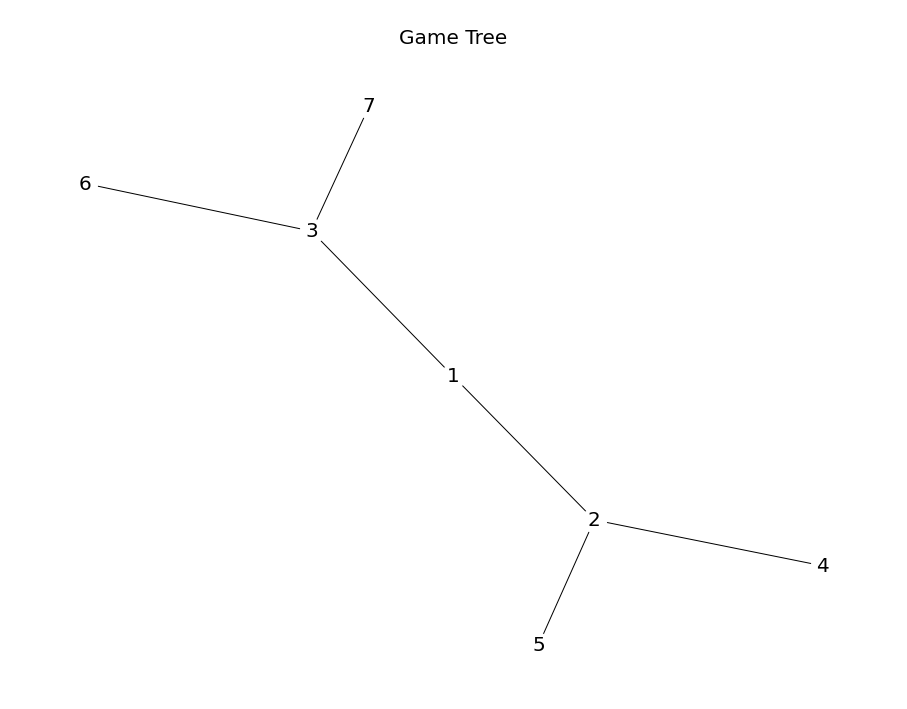

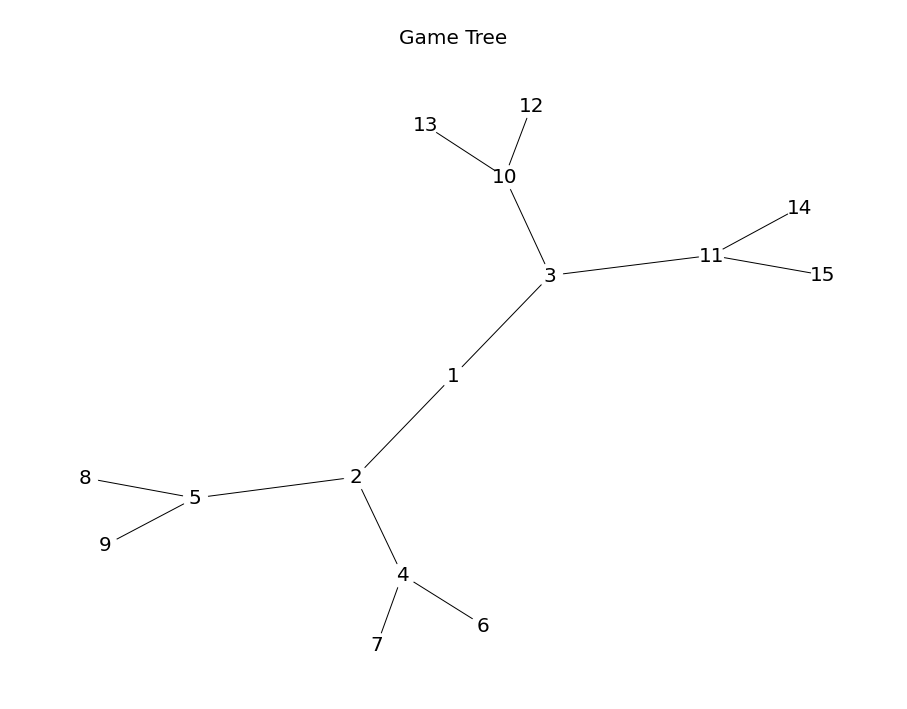

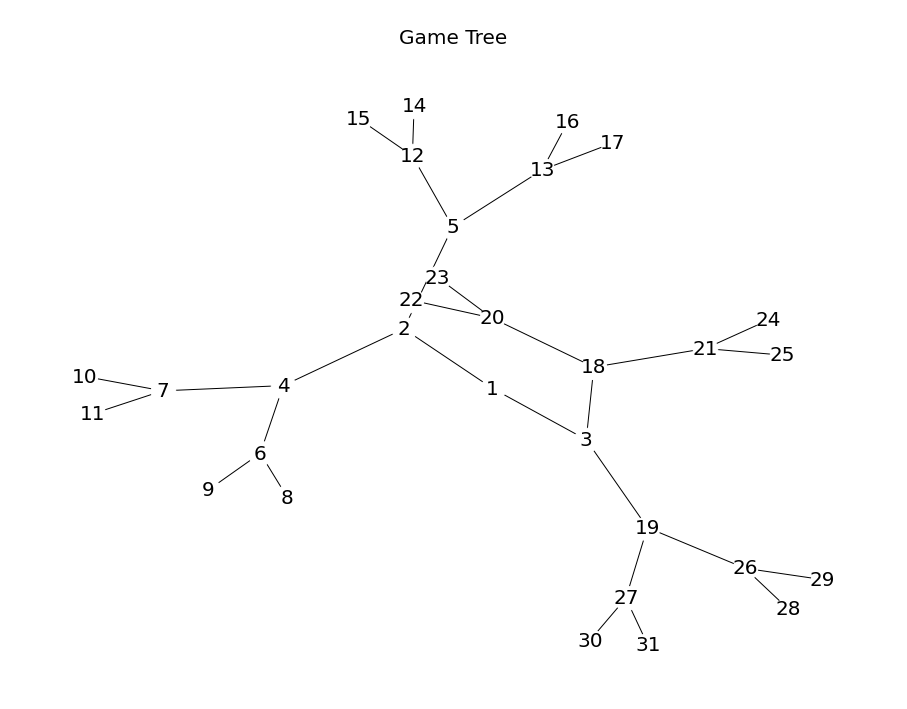

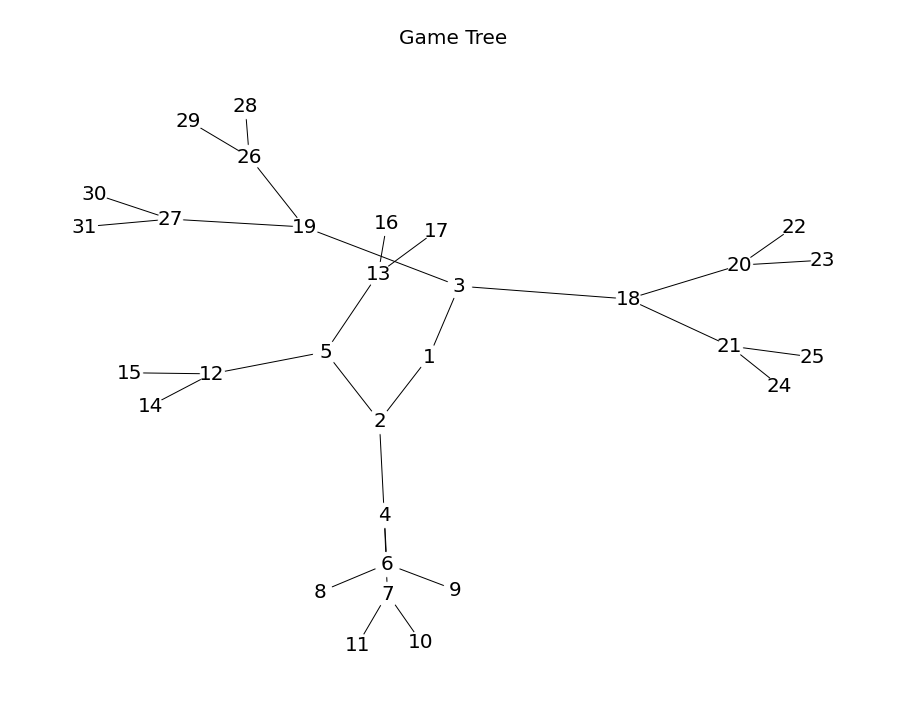

In [ ]:
import time
import timeit
from math import inf
from random import randint

import matplotlib.pyplot as plt
from networkx.classes.function import get_node_attributes
from ipywidgets import Dropdown, Button, Text, IntText, HBox, VBox, widgets, Layout
from IPython.display import clear_output
import networkx as nx

# set up game menu bar
# parameters
depth_box = Dropdown(description='Depth:', options=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10], value=2, disabled=False, layout=Layout(width='140px'))
search_button = Button(description='Search')
# info
enque_text = Text(description='Enqueuings:', value='-', placeholder='',  disabled=False, layout=Layout(width='140px'))
time_text = Text(description='Seach time:', value='-', placeholder='',  disabled=False, layout=Layout(width='160px'))
move_text = Text(description='Best Move:', value='-', placeholder='',  disabled=False, layout=Layout(width='200px'))
menu = HBox([depth_box, enque_text, time_text, move_text, search_button])

# output widget for graph
out = widgets.Output()

w = widgets.VBox([menu, out])
 
max_depth = depth_box.value  # max depth value

# menu handlers
def depth_box_eventhandler(change):
    """Eventhandler for the depth type dropdown widget"""
    global max_depth
    max_depth = change.new
    #gen_graph()  # generate new graph
    #draw_graph()

def search_eventhandler(obj):
    """Eventhandler for the search button"""
    global game
    game = Game()  # instance of game
    move_text.value = 'Searching...'
    move_text.value = str(game.minimax_decision(1))
    # searh time in seconds
    #time_text.value = str(int(
        #timeit.timeit('game.minimax_decision(1)', 'from __main__ import game', number=1000)*1000)) + ' \u03BCs'
    draw_graph()

depth_box.observe(depth_box_eventhandler, names='value')
search_button.on_click(search_eventhandler)


# Using networkx to plot a tree
def gen_graph():
  global g  # make graph available
  g = nx.Graph()  # empty graph
  # create binary tree of depth d
  g.add_nodes_from([((2 ** d) + b, {"pos": (10/((2**d)+1)*(b+1), -d), "value": 0}) for d in range(depth) for b in range(2 ** d)])
  g.add_edges_from([(((2 ** d) + b)//2, (2 ** d) + b, {'colour': 'red'}) for d in range(depth) for b in range(2 ** d)])
  g.remove_node(0)  # remove node 0 generated by edge from root node 1 in add_edges

  # put random numbers in leaf nodes
  for node in range(2**(depth-1), 2**depth):  # leaf node indices  
    g.nodes[node]['value'] = randint(1,9)
  

class Game():
  """ Class to play a game using minimax
  
  Use Networkx graph to store nodes:
  links to children to be able to draw it <-- possible moves
  indication of whether on max/min path to highlight path <-- max/min value
  path to terminal must be derived from top level going down through choices
  Plot the tree at the end
  """
  def __init__(self):
    self.tree = nx.Graph()  # empty graph
    self.depth = 0  # depth of search
    self.node = 1  # next node, starts at 1 (root)
    self.tree.add_node(self.node)  # add root node
  
  def player(self, s):
    """ Defines which player has the move in a state """
    pass
  
  def actions(self, s):
    """ Returns the set of legal moves in a state """
    # for binary tree is just next two states
    self.node += 2
    return [self.node - 1, self.node]
  
  def result(self, s, a):
    """ The transition model, which defines the result of a move """
    # actually generates the node and edge, from current state
    self.tree.add_edge(s, a)  # new node 
    return a
  
  def terminal_test(self, s):
    """ Test if the game is over """
    return self.depth >= max_depth  # at lowest depth
    
  def utility(self, s):
    """" The final numeric value for a game that ends in terminal state s for player p """
    v = randint(1,9)  # terminal state has random value
    self.tree.nodes[s]['value'] = v
    return v  # value of node s

  """ Minimax algorithm """
  def minimax_decision(self, state):  # -> action
    v = max([self.min_value(self.result(state, a)) for a in self.actions(state)])
    # need to know which node was max
    self.tree.nodes[state]['value'] = f'MAX [{v}]'  # put max on node
    return v

  def max_value(self, state):  # -> utility_value
    self.depth += 1  # increase depth
    if self.terminal_test(state):
      v = self.utility(state)
    else:
      v = -100
      for action in self.actions(state):
        va = self.min_value(self.result(state, action))
        if va > v:  # new max
          v = va
          s = action
      self.tree.nodes[state]['value'] = f'MAX [{v}]'  # put max on node
      self.tree.nodes[state]['path'] = s  # put link to max node on parent
    self.depth -= 1  # decrease depth again
    return v

  def min_value(self, state):  # -> utility_value
    self.depth += 1  # increase depth
    if self.terminal_test(state):
      v = self.utility(state)
    else:
      v = 100
      for action in self.actions(state):
        va = self.max_value(self.result(state, action))
        if va < v:  # new min
          v = va  # value
          s = action  # its state
      self.tree.nodes[state]['value'] = f'MIN [{v}]'  # put min on node
      self.tree.nodes[state]['path'] = s  # put link to min node on parent
    self.depth -= 1  # decrease depth again
    return v


def draw_graph():
  with out:
    fig = plt.figure(figsize=(16, 12))
    plt.title('\nGame Tree', size=20)
    fig.set_tight_layout(False)  # get rid of tight layout error

    # get positions of nodes
    # go from root to neighbours which must be at next level
    # add value labels and path edge colours at the same time?
    g.add_nodes_from([((2 ** d) + b, {"pos": (10/((2**d)+1)*(b+1), -d), "value": 0}) for d in range(depth) for b in range(2 ** d)])




    #pos = nx.get_node_attributes(g, "pos")  # get node positions for plot
    # list of edge colors for plotting - highlight edges in path from root to move
    #edge_colours = ['green' if g.nodes[e[0]].get('path') and (g.nodes[e[0]]['path'] == e[1]) else 'red' for e in g.edges(data=True)]
    #colours = nx.get_edge_attributes(g,"colour").values()
    #nx.draw(g, pos=pos, node_size=600, node_color='w',  edge_color=edge_colours, font_size=20)
    nx.draw(game.tree, node_size=600, node_color='w', with_labels=True, font_size=20)
    #node_labels = nx.get_node_attributes(g,'value')
    #nx.draw_networkx_labels(g, pos=pos, labels = node_labels)


display(w)  # display widgets




In [ ]:
tfrom IPython.display import display, clear_output
import ipywidgets as widgets
import random

b = widgets.Button(
    description='Show Random',
    disabled=False,
    button_style='info',
    tooltip='Click me',
    icon='check'
)
display(b)

out = widgets.Output()
display(out)

def on_button_clicked(b):
    with out:
        clear_output()
        print("New hello from each button click!. This hello from {}.".format(random.choice(list(range(100)))))

b.on_click(on_button_clicked)

Button(button_style='info', description='Show Random', icon='check', style=ButtonStyle(), tooltip='Click me')

Output()

A FEN "record" defines a particular game position, all in one text line and using only the ASCII character set. A text file with only FEN data records should have the file extension ".fen".

A FEN record contains six fields. The separator between fields is a space. The fields are:

- Piece placement (from White's perspective). Each rank is described, starting with rank 8 and ending with rank 1; within each rank, the contents of each square are described from file "a" through file "h". Following the Standard Algebraic Notation (SAN), each piece is identified by a single letter taken from the standard English names (pawn = "P", knight = "N", bishop = "B", rook = "R", queen = "Q" and king = "K"). White pieces are designated using upper-case letters ("PNBRQK") while black pieces use lowercase ("pnbrqk"). Empty squares are noted using digits 1 through 8 (the number of empty squares), and "/" separates ranks.

- Active color. "w" means White moves next, "b" means Black moves next.
Castling availability. If neither side can castle, this is "-". Otherwise, this has one or more letters: "K" (White can castle kingside), "Q" (White can castle queenside), "k" (Black can castle kingside), and/or "q" (Black can castle queenside). A move that temporarily prevents castling does not negate this notation.

- En passant target square in algebraic notation. If there's no en passant target square, this is "-". If a pawn has just made a two-square move, this is the position "behind" the pawn. This is recorded regardless of whether there is a pawn in position to make an en passant capture.

- Halfmove clock: The number of halfmoves since the last capture or pawn advance, used for the fifty-move rule.

- Fullmove number: The number of the full move. It starts at 1, and is incremented after Black's move.

Examples
The following example is from the FEN specification:

Here's the FEN for the starting position:

rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w KQkq - 0 1

In [ ]:
""" Parser a FEN-encoded string representing a chess position and return a depiction of the board

Uss the Unicode chess symbols (♔,♕,♘,etc.)
Board is drawn from the perspective of the active color (i.e. the side making the next move).

Empty white square: ▇ (2587)
Empty black square: ＿ (FF3F)
White king (K): ♚ (265A)
White queen (Q): ♛ (265B)
White rook (R): ♜ (265C)
White bishop (B): ♝ (265D)
White knight (N): ♞ (265E)
White pawn (P): ♟ (265F)
Black king (k): ♔ (2654)
Black queen (q): ♕ (2655)
Black rook (r): ♖ (2656)
Black bishop (b): ♗ (2657)
Black knight (n): ♘ (2658)
Black pawn (p): ♙ (2659)
"""
from enum import Enum

piece = {
  'E': '\u2587',
  'e': '\uFF3F',
  'K': '\u265A',
  'Q': '\u265B',
  'R': '\u265C',
  'B': '\u265D',
  'N': '\u265E',
  'P': '\u265F',
  'k': '\u2654',
  'q': '\u2655',
  'r': '\u2656',
  'b': '\u2657',
  'n': '\u2658',
  'p': '\u2659'}

board = [['x']*8 for i in range(8)]

test_fen = 'rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR b KQkq - 0 1'

def fen_parse(fen):
  fen_fields = test_fen.split(' ')
  turn = fen_fields[1]
  rank = 7 if turn == 'w' else 0
  file = 0

  for c in fen_fields[0]:  # go through first field
    if c == '/':  # end of rank
      rank = rank + (-1 if turn == 'w' else 1)  # new rank
      file = 0  # reset file
      continue
    if c in piece:  # standard piece
      board[rank][file] = piece[c]  # put it on board
      file += 1
    else:  # must be empty squarre number
      for e in range(int(c)):  # number of empty squares
        board[rank][file] = piece['e'] if (rank + file) % 2 == 1 else piece['E']
        file += 1

fen_parse(test_fen)

for rank in board:
  print(''.join(rank))



♖♘♗♕♔♗♘♖
♙♙♙♙♙♙♙♙
▇＿▇＿▇＿▇＿
＿▇＿▇＿▇＿▇
▇＿▇＿▇＿▇＿
＿▇＿▇＿▇＿▇
♟♟♟♟♟♟♟♟
♜♞♝♛♚♝♞♜
